In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/fk200/Downloads/archive/Superstore.csv', encoding = 'latin1')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Task-1 Line Plot-Sales over Order Date

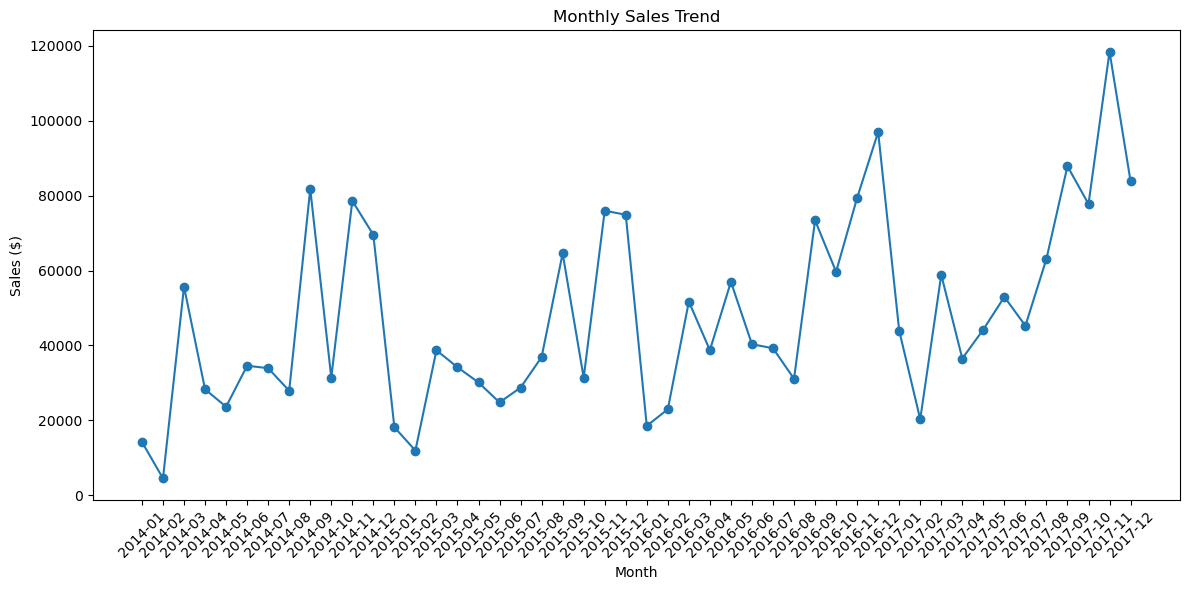

In [5]:
# Convert Order Date to datetime

df['Order Date'] = pd.to_datetime(df['Order Date'])

# Grou by Month and sum sales
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

# Line plot

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o', linestyle = '-')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('C:/Users/fk200/Downloads/monthly_sales_trend.png',dpi=300)
plt.show()

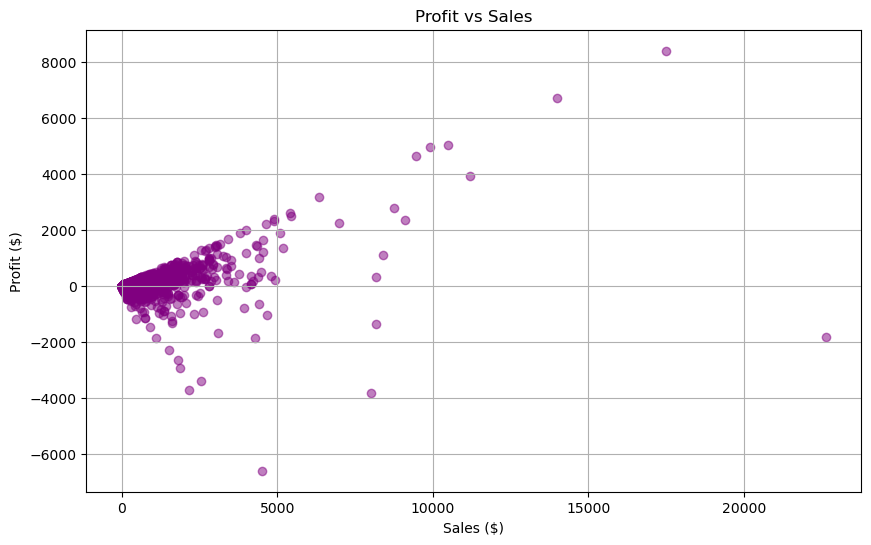

In [6]:
# Scatter Plot - Profit vs Sales
plt.figure(figsize=(10, 6))
plt.scatter(df['Sales'], df['Profit'], alpha = 0.5, c = 'purple')
plt.title('Profit vs Sales')
plt.xlabel('Sales ($)')
plt.ylabel('Profit ($)')
plt.grid(True)
plt.savefig('C:/Users/fk200/Downloads/profit_vs_sales.png', dpi=300)
plt.show()

# Task-2 Plot Customization

### 2.1 Line Plot with Customization 

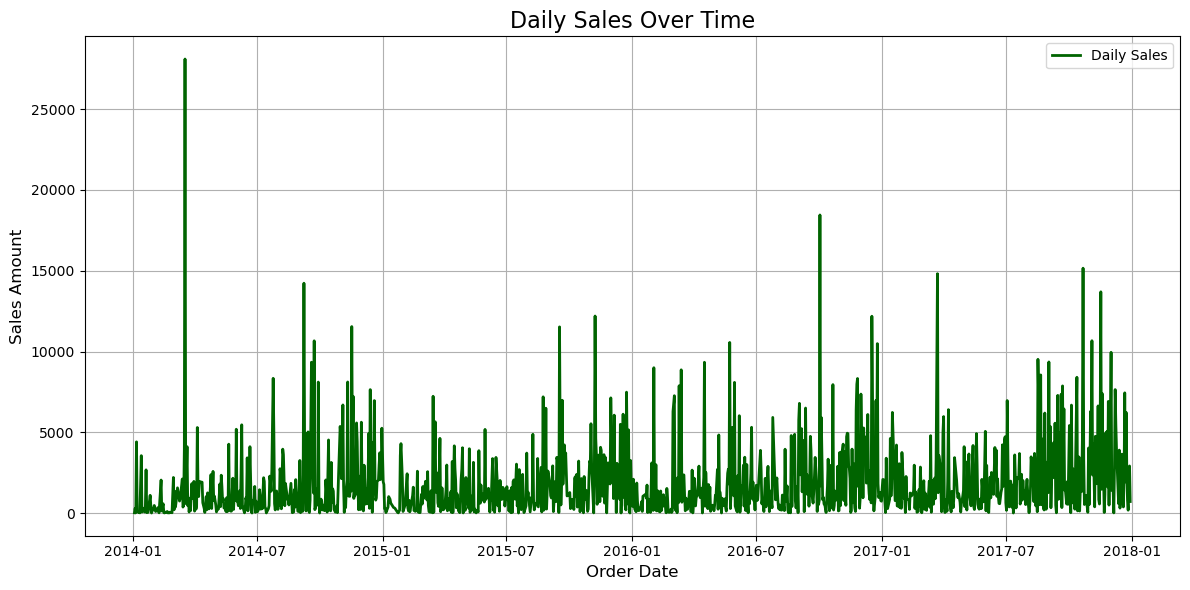

In [9]:
# Sort by date
df_sorted = df.sort_values('Order Date')

# Group by date and calculate daily sales
daily_sales = df_sorted.groupby('Order Date')['Sales'].sum()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, color='darkgreen', linewidth=2, label='Daily Sales')

# Customizations
plt.title('Daily Sales Over Time', fontsize=16)
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Saving the figure

plt.savefig('C:/Users/fk200/Downloads/daily_sales_trend.png', dpi=300)
plt.show()

### Scatter Plot with Axis Limits

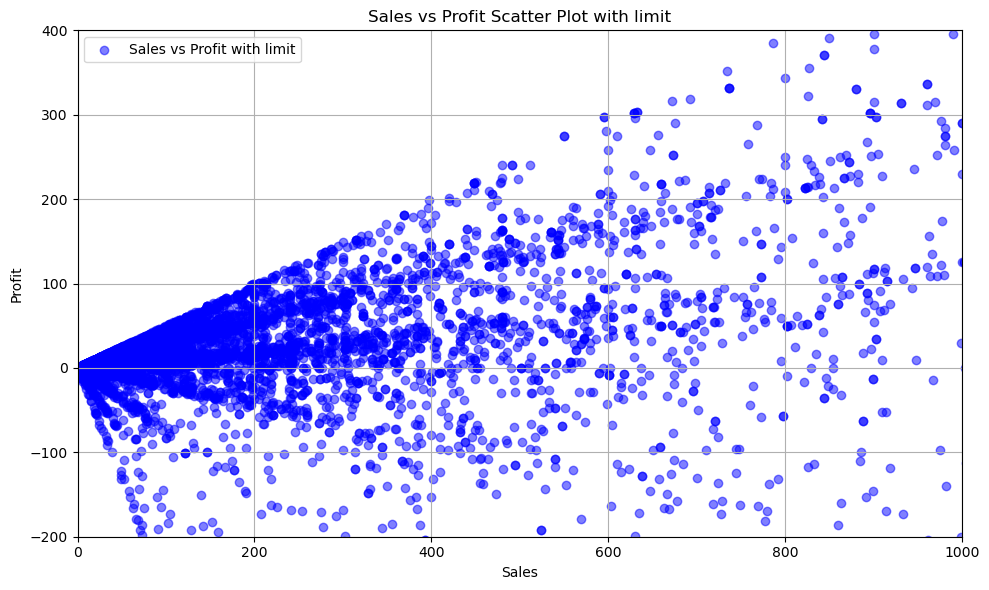

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Sales'], df['Profit'], alpha=0.5, color='blue', label='Sales vs Profit with limit')

# Customizations
plt.title('Sales vs Profit Scatter Plot with limit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.xlim(0, 1000)  # Set x-axis limit to focus on smaller values
plt.ylim(-200, 400)
plt.grid(True)  
plt.legend()
plt.tight_layout()

plt.savefig('C:/Users/fk200/Downloads/sales_vs_profit with limit.png', dpi=300)
plt.show()

# Task-3 Seaborn Introduction

In [13]:
import seaborn as sns

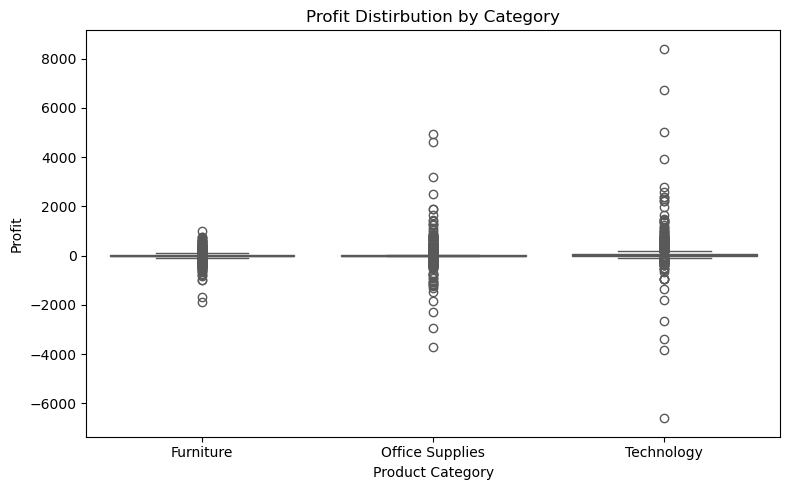

In [14]:
# Creating seaborn visualizations
# Distribution of Profit by Category

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x= 'Category', y= 'Profit', hue= 'Category', palette= 'Set2', legend= False)
plt.title('Profit Distirbution by Category')
plt.xlabel('Product Category')
plt.ylabel('Profit')
plt.tight_layout()
plt.savefig('C:/Users/fk200/Downloads/boxplot_profit_by_category.png', dpi=300)
plt.show()

# Task-3 Histogram- Distribution of Discount

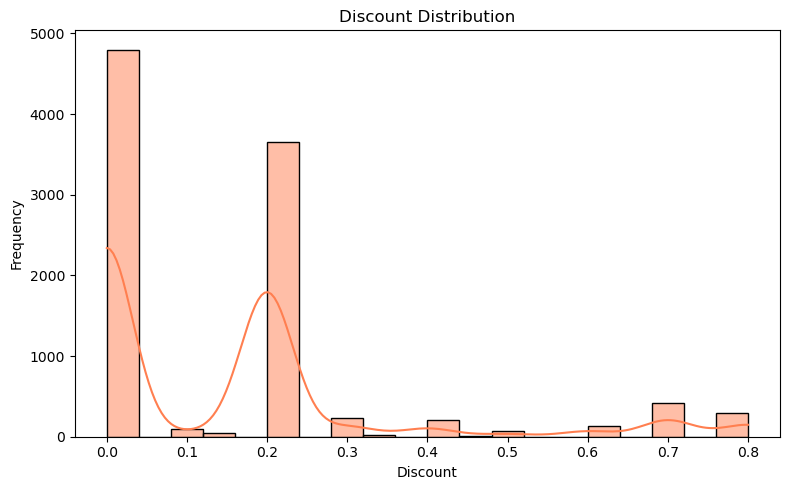

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Discount'], bins=20, kde=True, color='coral')
plt.title('Discount Distribution')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('C:/Users/fk200/Downloads/hist_discount.png', dpi=300)
plt.show()

# Heatmap-Correlation Between Numerical Features

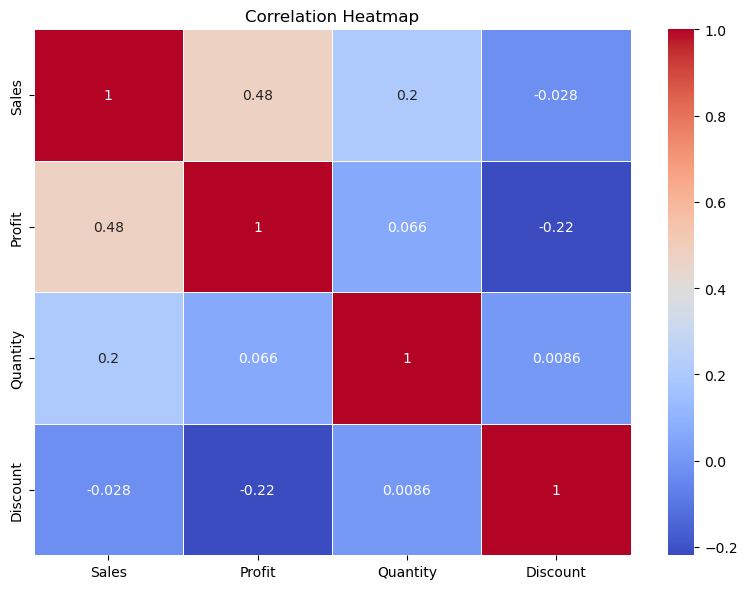

In [18]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Sales', 'Profit', 'Quantity', 'Discount']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('C:/Users/fk200/Downloads/heatmap_correlation.png', dpi=300)
plt.show()

# Task-4 Sample Visualization Project

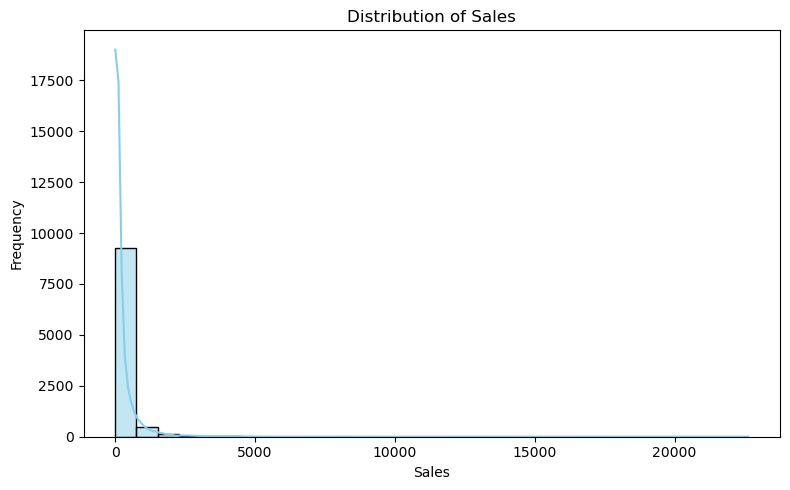

In [20]:
# i) Histogram - Distribution of Sales

plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], bins = 30, kde = True, color = 'skyblue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('C:/Users/fk200/Downloads/histogram_sales.png', dpi=300)
plt.show()


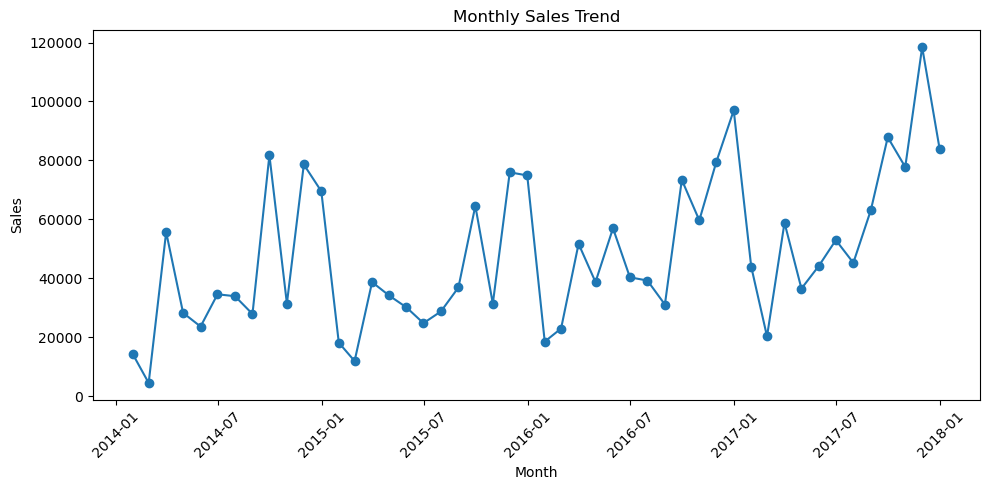

In [21]:
# Line Plot-Sales Trend Over Time

#grouping by month
monthly_sales = df.resample('ME', on='Order Date')['Sales'].sum()

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('C:/Users/fk200/Downloads/lineplot_monthly_sales.png', dpi=300)
plt.show()

# Bar Plot-Total Profit by Region

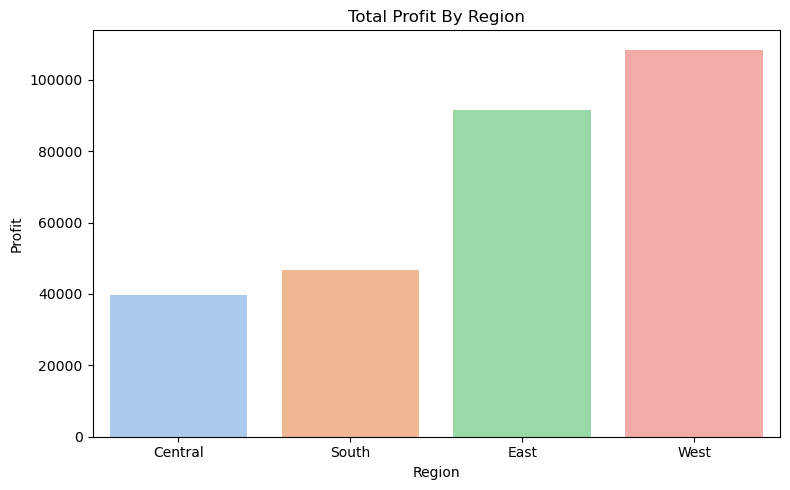

In [59]:
region_profit = df.groupby('Region')['Profit'].sum().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=region_profit.index, y=region_profit.values, hue=region_profit.index, palette='pastel', legend=False)
plt.title('Total Profit By Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.tight_layout()
plt.savefig('C:/Users/fk200/Downloads/Barplot_Total_Profit_Region.png', dpi=300)
plt.show()

# Boxplot-Quantity Distribution per Ship Mode

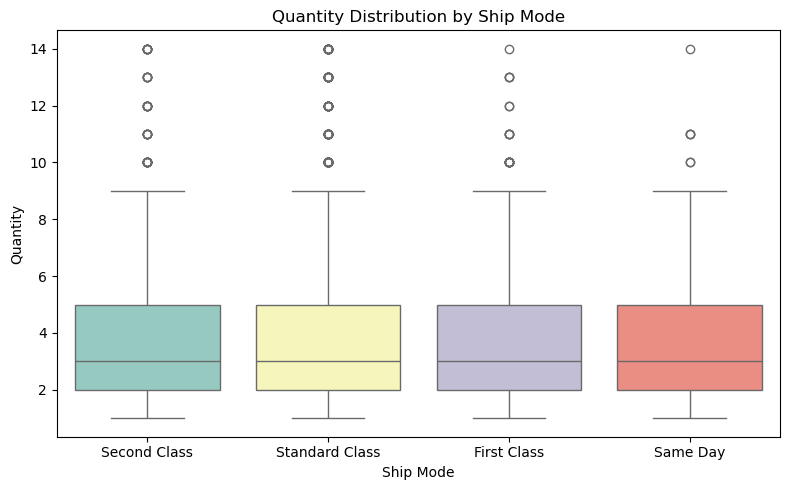

In [66]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Ship Mode', y='Quantity', hue='Ship Mode', palette= 'Set3', legend = False)
plt.title('Quantity Distribution by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Quantity')
plt.tight_layout()
plt.savefig('boxplot_quantity_shipmode.png', dpi=300)
plt.show()

# Task-5 Publish Polish-Quality Figures

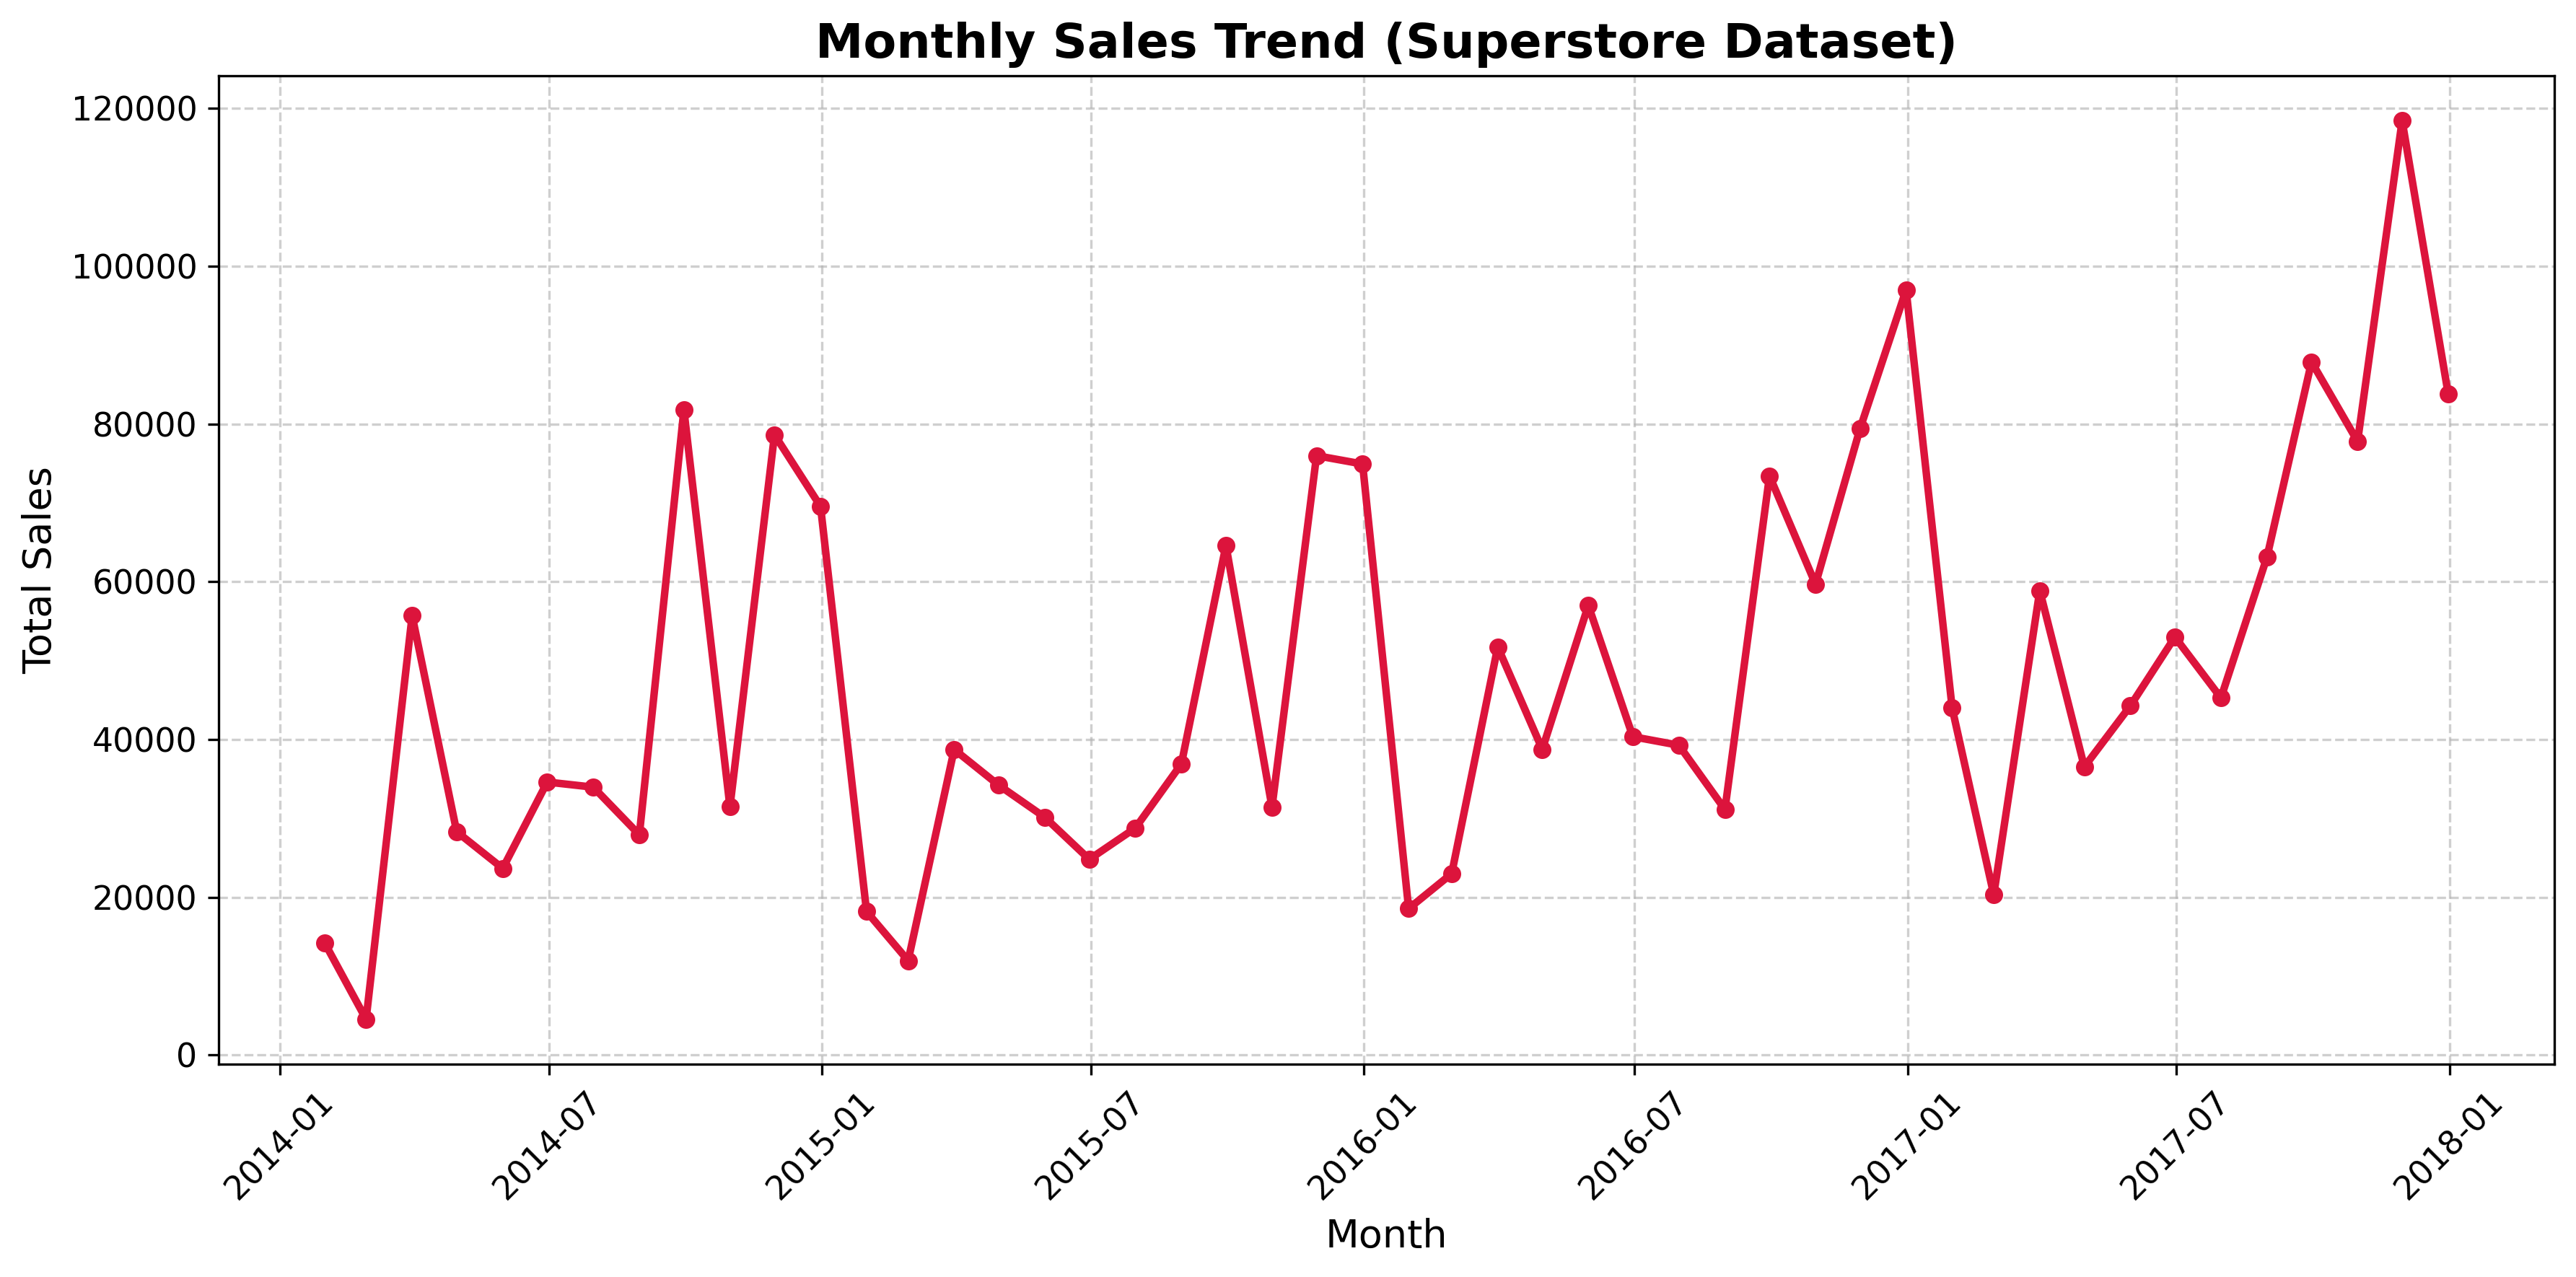

In [75]:
# we already converted 'Order Date' to datetime

# Aggregate sales per month
monthly_sales=df.resample('ME', on='Order Date')['Sales'].sum()

# Plotting

plt.figure(figsize=(12, 6), dpi=300) # High DPI and wider figures
plt.plot(monthly_sales.index, monthly_sales.values, color='crimson', linewidth=2.5, marker='o', markersize=5)

# Title & Labels with improved font size
plt.title('Monthly Sales Trend (Superstore Dataset)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=13)
plt.ylabel('Total Sales', fontsize=13)

# Ticks and Grid

plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Tight Layout and Save

plt.tight_layout()
plt.savefig('C:/Users/fk200/Downloads/final_monthly_sales_trend.png', dpi=300)
plt.show()